In [61]:
import xml.etree.ElementTree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def parse_aspect_node(aspect_node):
    category = aspect_node.get('category')
    polarity = aspect_node.get('polarity')
    
    typo_polarity_map = {
        'POSITIVE': 'POSITIVE',
        'NEGATIVE': 'NEGATIVE',
        'NEATIVE': 'NEGATIVE',
        'NEGTIVE': 'NEGATIVE',
        ' NEGATIVE ': 'NEGATIVE',
        'NEGATIVE ': 'NEGATIVE',
        'POSITIVETIVE': 'POSITIVE',
        'POSITUVE': 'POSITIVE'
    }
    
    polarity = typo_polarity_map[polarity]
    
    return {category: polarity}    

def parse_aspects_node(aspects_node):
    default_aspects = {
        'FOOD': 'NEUTRAL',
        'AMBIENCE': 'NEUTRAL',
        'SERVICE': 'NEUTRAL',
        'PRICE': 'NEUTRAL'
    }
    
    for aspect in aspects_node.getchildren():
        default_aspects.update(parse_aspect_node(aspect))
    
    return default_aspects

def parse_review_node(review_node):
    text = review_node.find('text').text
    rid = review_node.get('rid')
    aspects = review_node.findall('aspects')
    
    default_dict = {
        'rid': int(rid),
        'text': text
    }
    
    res = []
    for aspect in aspects:
        cur_dict = default_dict.copy()
        cur_dict.update(parse_aspects_node(aspect))
        res.append(cur_dict)
        
    return res

def filter_same_train_aspects(reviews):
    res = []
    for v in reviews:
        if len(v['aspects']) == 1 or v['aspects'][0] == v['aspects'][1]:
            res.append(v)
    
    return res

def filter_different_train_aspects(reviews):
    res = []
    for v in reviews:
        if len(v['aspects']) == 2 and not(v['aspects'][0] == v['aspects'][1]):
            res.append(v)
            
    return res

def parse_dataset(filename):
    root_node = xml.etree.ElementTree.parse(filename).getroot()
    review_nodes = root_node.findall('review')
    reviews = [item for sublist in review_nodes for item in parse_review_node(sublist)]
    
    return pd.DataFrame.from_dict(reviews)

In [62]:
filename = 'training_set.xml'

In [63]:
res = parse_dataset(filename)

In [64]:
single = []
first = []
second = []

for id in np.unique(res.rid.values):
    df = res[res.rid == id]
    if len(df) == 1 or (df.iloc[0] == df.iloc[1]).all():
        single.append(df.iloc[0])
    elif len(df) == 2:
        first.append(df.iloc[0])
        second.append(df.iloc[1])

df_single = pd.DataFrame(single).set_index('rid')
df_first = pd.DataFrame(first).set_index('rid')
df_second = pd.DataFrame(second).set_index('rid')

In [65]:
len(df_single)

2435

In [66]:
len(df_first)

1430

In [67]:
len(df_second)

1430

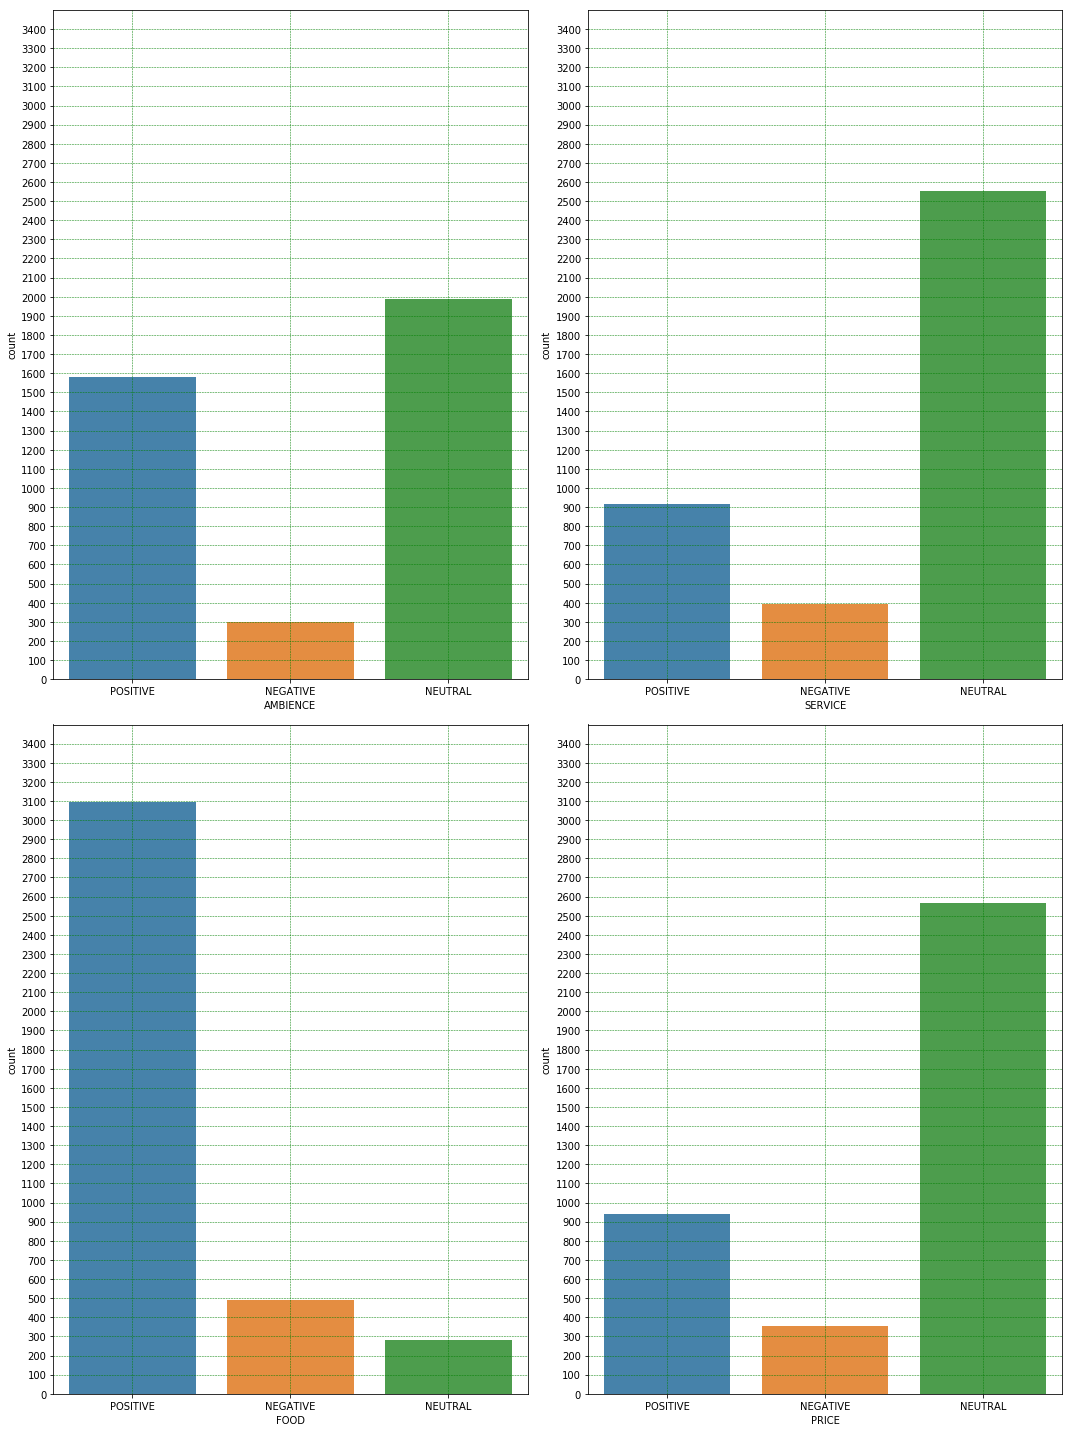

In [99]:
aspects = ['AMBIENCE', 'SERVICE', 'FOOD', 'PRICE']

plt.figure(figsize=(15,20))
for key, aspect in enumerate(aspects):
    plt.subplot(2, 2, key + 1)
    sns.countplot(df_single.append(df_first)[aspect], order=['POSITIVE', 'NEGATIVE', 'NEUTRAL'], alpha=0.9)
    plt.ylim((0, 3500))
    plt.yticks(range(0,3500,100))
    plt.grid(color='g', linestyle='--', linewidth=0.5)
    
plt.tight_layout()
plt.show()

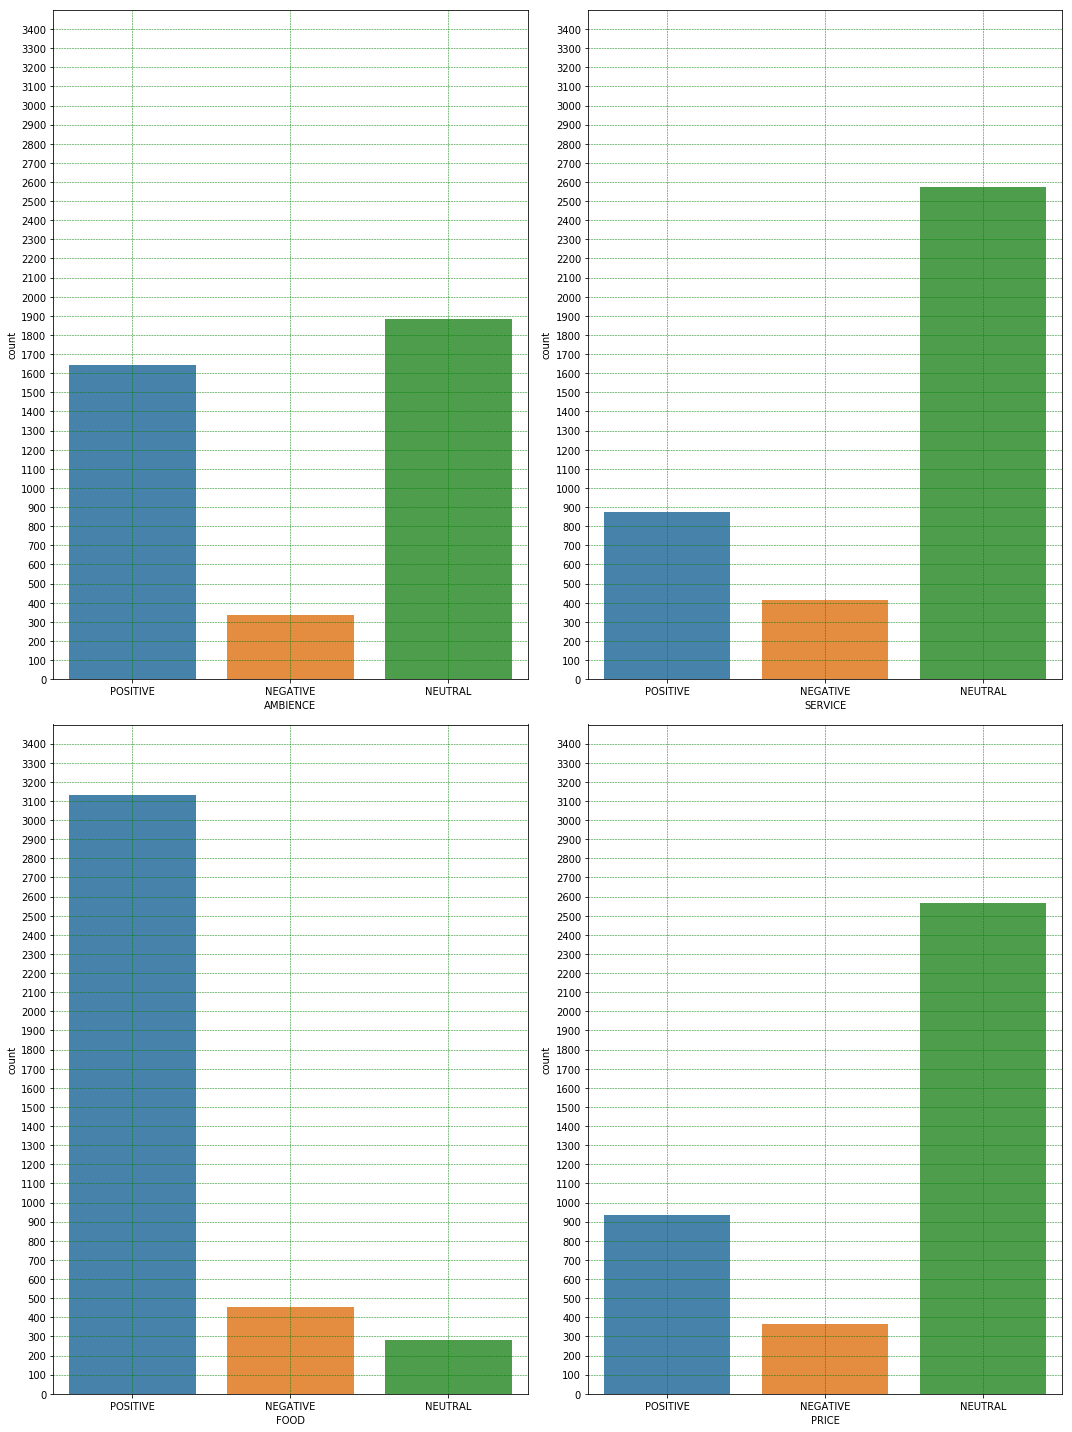

In [98]:
aspects = ['AMBIENCE', 'SERVICE', 'FOOD', 'PRICE']

plt.figure(figsize=(15,20))
for key, aspect in enumerate(aspects):
    plt.subplot(2, 2, key + 1)
    sns.countplot(df_single.append(df_second)[aspect], order=['POSITIVE', 'NEGATIVE', 'NEUTRAL'], alpha=0.9)
    plt.ylim((0, 3500))
    plt.yticks(range(0,3500,100))
    plt.grid(color='g', linestyle='--', linewidth=0.5)
    
plt.tight_layout()
plt.show()

In [89]:
from sklearn.metrics import cohen_kappa_score
y1 = df_single.append(df_first)['AMBIENCE'].values
y2 = df_single.append(df_second)['AMBIENCE'].values
cohen_kappa_score(y1, y2)

0.6938154402114098

In [90]:
from sklearn.metrics import cohen_kappa_score
y1 = df_single.append(df_first)['FOOD'].values
y2 = df_single.append(df_second)['FOOD'].values
cohen_kappa_score(y1, y2)

0.7092378824344516

In [91]:
from sklearn.metrics import cohen_kappa_score
y1 = df_single.append(df_first)['PRICE'].values
y2 = df_single.append(df_second)['PRICE'].values
cohen_kappa_score(y1, y2)

0.7915235031526734

In [92]:
from sklearn.metrics import cohen_kappa_score
y1 = df_single.append(df_first)['SERVICE'].values
y2 = df_single.append(df_second)['SERVICE'].values
cohen_kappa_score(y1, y2)

0.7805898299000118